<a href="https://colab.research.google.com/github/pratistha9903/python-project/blob/main/Pratistha_21csu465__Image_Compression_using_AutoEncoder_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL PROJECT (Image Compression Using AutoEncoder)

(Pratistha Srivastava 21csu465)

#Overall Project
1)Image compression using Auto encoder

2)Early Stopping used

3)MSE Model

4)Comparison of Compression Ratios Using Two Different Latent Dimensions

5)Comparison of MSE Using Two Different Latent Dimensions









#Image Compression Using AutoEncoder

**Objective-->** Dimensionality Reduction , Information Preservation


**Flow of AutoEncoder**

Input image-->Encoder-->Compressed Image-->Decoder-->Reconstruct Input Image


#1. Using Auto Encoder

**Import Modules**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

**Load the Dataset**

 MNIST is a dataset of 28x28 grayscale images of handwritten digits 0 through 9.

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()
#traning image,#training labels

In [ ]:
x_train, x_val=x_train[:-10000],x_train[-10000:]   # Splitting the training dataset into two parts: x_train and x_val

**Normalization**


In [ ]:
# Converting the pixel values of x_train,x_test and x_val to floats and scaling them to a range between 0 and 1
# This normalization helps in training the neural network model effectively
x_train=x_train.astype("float32")/255.
x_test=x_test.astype("float32")/255.
x_val=x_val.astype("float32")/255.

In [ ]:
print(x_train.shape)   # The shape is typically in format (num_samples, height, width), where num_samples is the number of images
print(x_test.shape)
print(x_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


**Original Source**

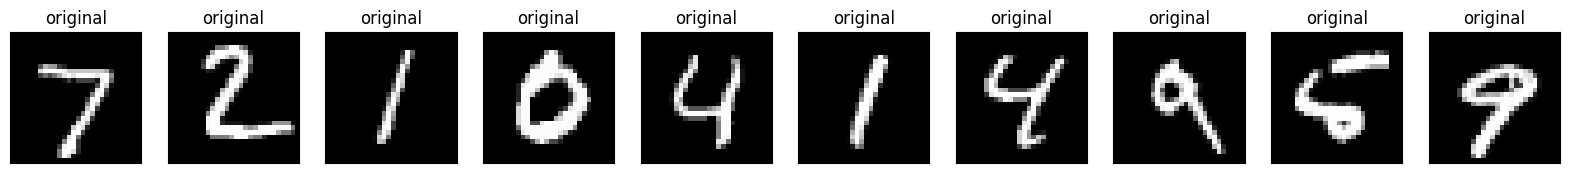

In [ ]:
n=10   # Number of images to display
plt.figure(figsize=(20,4))      #Creates a figure with a specific size (width=20 inches, height=4 inches)
for i in range(n):
  #display original
  ax=plt.subplot(2,n,i+1)    # Create a subplot for each image
  plt.imshow(x_test[i])     # Display the image from test dataset
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

**Auto - Encoding**

In [ ]:
latent_dim=16
class Autoencoder(Model):
  def __init__(self,latent_dim):        #Defining constructor & automatically be called when ever we are calling class
    super(Autoencoder,self).__init__()    # Call the constructor of the parent class
    self.latent_dim=latent_dim


#Encoder
    self.encoder=tf.keras.Sequential([
        layers.Flatten(),                     #28x28 -->784pixel
        layers.Dense(latent_dim, activation='relu')
    ])

 #Decoder
    self.decoder=tf.keras.Sequential([
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28,28))
    ])

  def call(self,x):
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
#.compile(): This is a method in Keras models that configures the model for training.
#adam-algorithms due to its efficiency and good performance in a wide range of tasks.
#MSE-it measures the average squared difference between the predicted output and the true output.

In [ ]:
#autoencoder.fit(): This method trains the autoencoder model.
history=autoencoder.fit(x_train,               #input training data
                        x_train,               #target training data
                epochs=10,   # the no of times entire training dataset passed be forward and backward through the network.
                shuffle=True,
                validation_data=(x_val, x_val))   #input and target validation data    #validate unseen data

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0443 - val_loss: 0.0285
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0267 - val_loss: 0.0247
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0242 - val_loss: 0.0231
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0230 - val_loss: 0.0225
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0225 - val_loss: 0.0222
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0221 - val_loss: 0.0219
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0219 - val_loss: 0.0217
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0218 - val_loss: 0.0217
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.021

**Encoder Summary**

In [ ]:
print(autoencoder.encoder.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
Total params: 12560 (49.06 KB)
Trainable params: 12560 (49.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


**Decoder Summary**

In [ ]:
print(autoencoder.decoder.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 784)               13328     
                                                                 
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 13328 (52.06 KB)
Trainable params: 13328 (52.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
encoded_imgs=autoencoder.encoder(x_test).numpy()     #passing testing data to encoder & converting output into numpy array #to visual the img
decoded_imgs=autoencoder.decoder(encoded_imgs).numpy()

**Reconstructed Source**

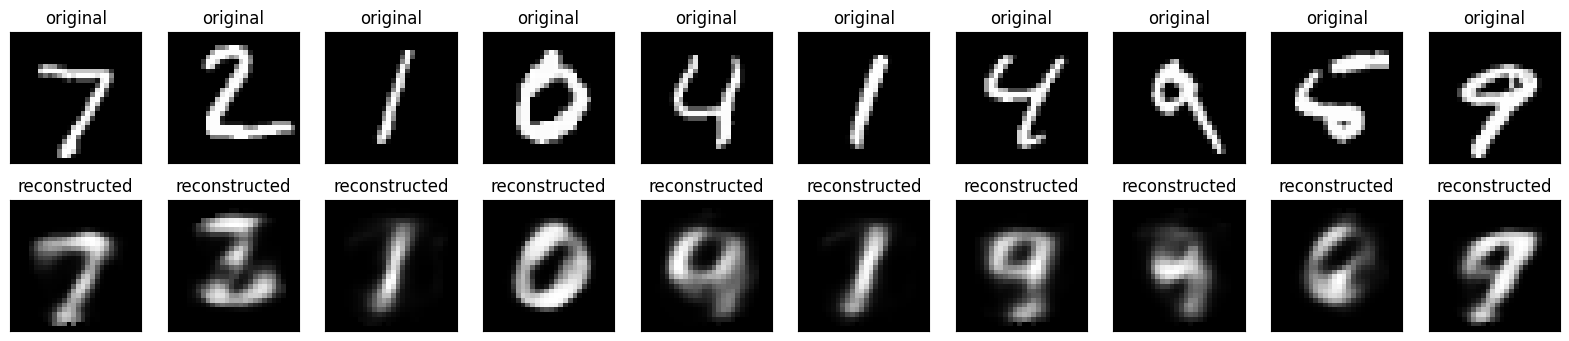

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #display original
  ax=plt.subplot(2,n,i+1)     # Create a subplot for each image
  plt.imshow(x_test[i])       # Display the image from test dataset
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax=plt.subplot(2 , n,i + 1+ n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
decoded_imgs = autoencoder.predict(x_test)  # It passes test dataset through autoencoder model, generating reconstructed images.
mse = np.mean(np.power(x_test - decoded_imgs, 2), axis=1) #finds squared difference between the original test images and the reconstructed images.
accuracy = np.mean(mse)   #mean of the mean squared errors -->overall average reconstruction error across the entire dataset.
print("Mean Squared Error:", accuracy)   #Lower values indicate better reconstruction accuracy.

313/313 [==============================] - 1s 2ms/step
Mean Squared Error: 0.033562876


**Visualization**

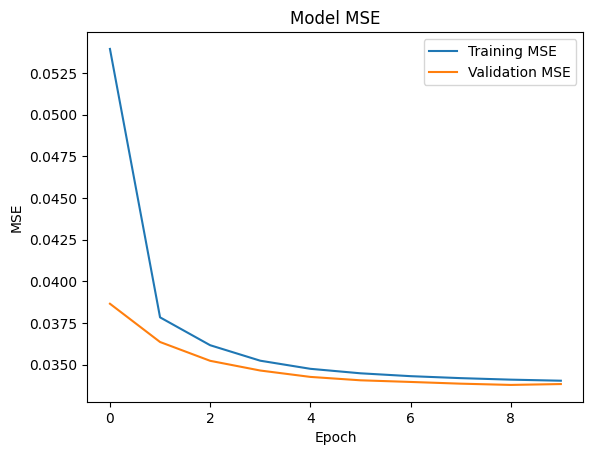

In [ ]:
plt.plot(history.history['loss'], label='Training MSE')   #plot
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()   #Display a legend to distinguish between training and validation MSE
plt.show()

#Early Stopping
If the validation loss doesn't improve for a certain number of epochs, training is stopped early.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
(x_train1, _), (x_test1, _) = mnist.load_data()
x_train1 = x_train1.astype('float32') / 255.0        #pixel-float-normalize
x_test1 = x_test1.astype('float32') / 255.0

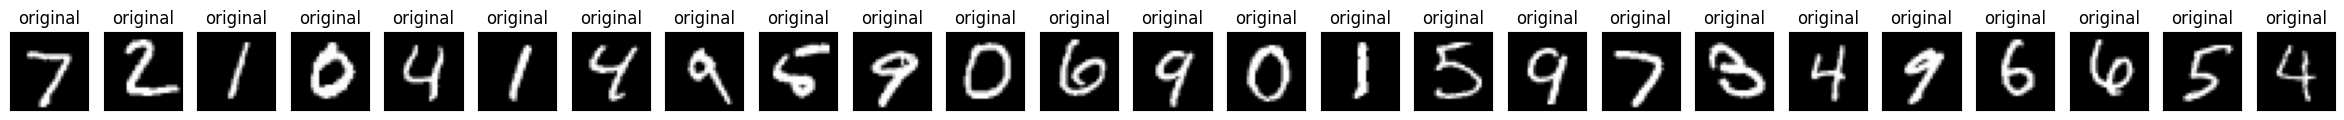

In [ ]:
n=25
plt.figure(figsize=(30,4))
for i in range(n):
  #display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test1[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [ ]:
autoencoder1 = Autoencoder(latent_dim)    # creating new instance of the Autoencoder class
autoencoder1.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
#patience=3,If the validation loss does not improve for 3 consecutive epochs, training will be stopped early.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)  #verbose=1 argument specifies that training progress will be displayed.
history1=autoencoder1.fit(x_train, x_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),                     #x_test is used both as input and target for validation.
                callbacks=[early_stopping])      #callback is used to prevent overfitting by monitoring the validation loss


Epoch 1/25
196/196 [==============================] - 2s 5ms/step - loss: 0.0949 - val_loss: 0.0668
Epoch 2/25
196/196 [==============================] - 1s 4ms/step - loss: 0.0590 - val_loss: 0.0516
Epoch 3/25
196/196 [==============================] - 1s 3ms/step - loss: 0.0483 - val_loss: 0.0447
Epoch 4/25
196/196 [==============================] - 1s 5ms/step - loss: 0.0436 - val_loss: 0.0416
Epoch 5/25
196/196 [==============================] - 1s 5ms/step - loss: 0.0412 - val_loss: 0.0399
Epoch 6/25
196/196 [==============================] - 1s 5ms/step - loss: 0.0398 - val_loss: 0.0388
Epoch 7/25
196/196 [==============================] - 1s 4ms/step - loss: 0.0389 - val_loss: 0.0379
Epoch 8/25
196/196 [==============================] - 1s 4ms/step - loss: 0.0382 - val_loss: 0.0373
Epoch 9/25
196/196 [==============================] - 1s 4ms/step - loss: 0.0376 - val_loss: 0.0368
Epoch 10/25
196/196 [==============================] - 1s 4ms/step - loss: 0.0371 - val_loss: 0.0363

In [ ]:
encoded_imgs1=autoencoder1.encoder(x_test).numpy()
decoded_imgs1=autoencoder1.decoder(encoded_imgs).numpy()

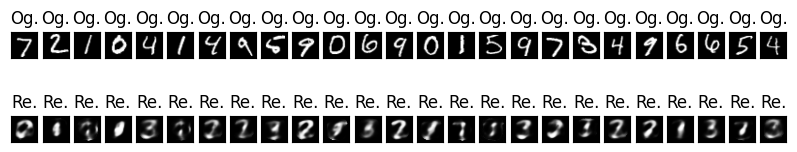

In [ ]:
n=25
plt.figure(figsize=(10,2))
for i in range(n):
  #display original
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test1[i])
  plt.title("Og.")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs1[i])
  plt.title("Re.")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs1 = autoencoder1.predict(x_test)     #generate reconstructed image
mse1 = np.mean(np.power(x_test1 - decoded_imgs1, 2), axis=1)     #sq diff btw original test image and reconstructed image
accuracy1 = np.mean(mse1)
print("Mean Squared Error:", accuracy1)

313/313 [==============================] - 1s 2ms/step
Mean Squared Error: 0.033796847


**Ploting the MSE Model**

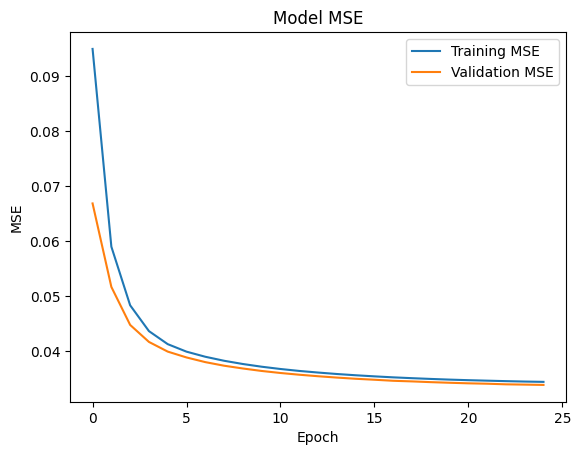

In [ ]:
plt.plot(history1.history['loss'], label='Training MSE')
plt.plot(history1.history['val_loss'], label='Validation MSE')
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Comparison of Compression Ratios Using Two Different Latent Dimensions








Putting latent dimension=8

In [ ]:
original_image_size = 28 * 28  # Assuming grayscale images of size 28x28 pixels

# Latent dimension
latent_dim = 8  # Dimensionality of the latent space

# Calculate compression ratio
compression_ratio = original_image_size / latent_dim

# Print compression ratio
print("Compression Ratio:", compression_ratio)

Compression Ratio: 98.0


Putting latent dimension=64

In [ ]:
original_image_size = 28 * 28  # Assuming grayscale images of size 28x28 pixels

# Latent dimension
latent_dim = 64  # Dimensionality of the latent space

# Calculate compression ratio
compression_ratio = original_image_size / latent_dim

# Print compression ratio
print("Compression Ratio:", compression_ratio)

Compression Ratio: 12.25


#Conclusion
When the latent dimension is set to 8, the image undergoes a greater degree of compression compared to when the latent dimension is set to 64. Specifically, the compression ratio for a latent dimension of 64 is calculated to be 12.25, whereas for a latent dimension of 8, the compression ratio is determined to be 98.

#Comparison of MSE Using Two Different Latent Dimensions

When latent dimension is 8
Mean Squared Error is 0.033562876  without using Early Stopping .
After using Early Stopping MSE is 0.033796847

When latent dimension was 64
Mean Squared Error is 0.0039  without using Early Stopping .
After using Early Stopping MSE is 0.0040








#Conclusion

# At latent dimension (8),it results in higher Mean Squared Error compared to a latent dimension (64), indicating that the reconstruction quality is poorer when compressing the image into a smaller latent space.


The impact of Early Stopping on MSE is minimal for both latent dimensions, with only slight increases observed after its implementation.

 Higher latent dimension (64) yields better compression quality, as evidenced by the lower MSE, while a lower latent dimension (8) sacrifices compression quality for greater compression ratio, as indicated by the higher MSE.


#References
https://www.youtube.com/watch?v=XrykiaS_eOs

https://www.geeksforgeeks.org/auto-encoders/
